# Olive Tree Disease Recognition
## IDSS Hackathon Track 2
### Mahmoud Limam & Yahya Hajlaoui, Enet'Com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator().flow_from_directory("../input/zeytin-yaprak-224-aug/Zeytin_224x224_Augmented/train", target_size=(256, 256), class_mode="sparse")
val_gen = ImageDataGenerator().flow_from_directory("../input/zeytin-yaprak-224-aug/Zeytin_224x224_Augmented/val", target_size=(256, 256), class_mode="sparse")
test_gen = ImageDataGenerator().flow_from_directory("../input/zeytin-yaprak-224-aug/Zeytin_224x224_Augmented/test", target_size=(256, 256), class_mode="sparse")

Found 5011 images belonging to 3 classes.
Found 980 images belonging to 3 classes.
Found 970 images belonging to 3 classes.


In [ ]:
xception = tf.keras.applications.Xception(
    input_shape=(256,256,3),
    include_top=False,
    classes=3)

2021-12-05 07:38:06.933147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 07:38:07.024265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 07:38:07.025103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 07:38:07.026321: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in xception.layers:
    layer.trainable = True

In [ ]:
dense_top = tf.keras.Sequential([
    layers.Flatten(name="flatten"),
    layers.Dropout(0.4, name="drpt1"),
    layers.BatchNormalization(name="bn1"),
    layers.Dense(256, activation="relu", name="dns1"),
    layers.Dropout(0.25, name="drpt2"),
    layers.BatchNormalization(name="bn2"),
    layers.Dense(128, activation="relu", name="dns2"),
    layers.Dropout(0.15, name="drpt3"),
    layers.BatchNormalization(name="bn3"),
    layers.Dense(3, activation="softmax", name="dns3-output")
], name="DenseTop")

In [ ]:
class xception_prerocessing(tf.keras.layers.Layer):
    def __init__(self):
        super(xception_prerocessing, self).__init__()
    def call(self, inputs):
        return tf.keras.applications.xception.preprocess_input(inputs)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(256,256,3)),
                             xception_prerocessing(),xception, dense_top], name="Prototype3")

In [ ]:
model.summary()

Model: "Prototype3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception_prerocessing (xcept (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
DenseTop (Sequential)        (None, 3)                 34113795  
Total params: 54,975,275
Trainable params: 54,657,835
Non-trainable params: 317,440
_________________________________________________________________


In [ ]:
import tensorflow_addons as tfa
model.compile(optimizer = "adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
check = ModelCheckpoint(filepath='model.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
history = model.fit(x=train_gen, validation_data=val_gen, epochs=20, callbacks=[check])

2021-12-05 07:38:29.618806: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-12-05 07:38:35.863917: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


157/157 [==============================] - 101s 562ms/step - loss: 0.3765 - accuracy: 0.8625 - val_loss: 0.2975 - val_accuracy: 0.9337

Epoch 00001: val_loss improved from inf to 0.29750, saving model to model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
157/157 [==============================] - 82s 523ms/step - loss: 0.1368 - accuracy: 0.9587 - val_loss: 0.5159 - val_accuracy: 0.8051

Epoch 00002: val_loss did not improve from 0.29750
Epoch 3/20
157/157 [==============================] - 82s 522ms/step - loss: 0.1149 - accuracy: 0.9647 - val_loss: 0.4552 - val_accuracy: 0.8714

Epoch 00003: val_loss did not improve from 0.29750
Epoch 4/20
157/157 [==============================] - 82s 523ms/step - loss: 0.0730 - accuracy: 0.9784 - val_loss: 0.7015 - val_accuracy: 0.7378

Epoch 00004: val_loss did not improve from 0.29750
Epoch 5/20
157/157 [==============================] - 82s 522ms/step - loss: 0.0609 - accuracy: 0.9800 - val_loss: 0.3504 - val_accuracy: 0.8796

Epoch 00005: val_loss did not improve from 0.29750
Epoch 6/20
157/157 [==============================] - 82s 523ms/step - loss: 0.0701 - accuracy: 0.9771 - val_loss: 0.4051 - val_accuracy: 0.9051

Epoch 00006: val_loss did not improve from 0.29750
Epoch 7/20
157/

In [ ]:
from keras import Model

In [ ]:
#model.load_weights("./model.h5")

In [ ]:
ypred_trn = model.predict(train_gen)
ypred_val = model.predict(val_gen)
ypred_tst = model.predict(test_gen)

In [ ]:
tf.argmax(ypred_trn, axis=1)

<tf.Tensor: shape=(5011,), dtype=int64, numpy=array([2, 2, 1, ..., 0, 0, 1])>

In [ ]:
train_gen.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
trainprd = tf.argmax(ypred_trn, axis=1)
valprd = tf.argmax(ypred_val, axis=1)
testprd = tf.argmax(ypred_tst, axis=1)

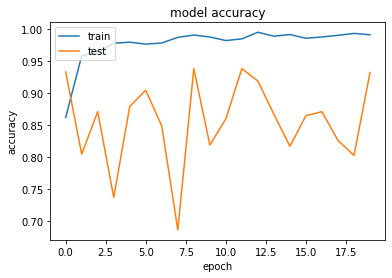

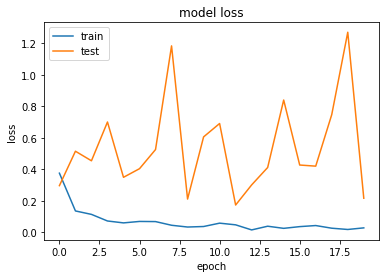

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from PIL import Image

In [ ]:
import os

In [ ]:
names = ["Train", "Val", "Test"]
folders = ["../input/zeytin-yaprak-224-aug/Zeytin_224x224_Augmented/train", "../input/zeytin-yaprak-224-aug/Zeytin_224x224_Augmented/val", "../input/zeytin-yaprak-224-aug/Zeytin_224x224_Augmented/test"]
gens = [train_gen, val_gen, test_gen]
resdict = dict()
for i in range(len(names)):
    predlabels=[]
    truelabels=[]
    fold = folders[i]
    subs = os.listdir(fold)
    for j in range(len(subs)):
        s = subs[j]
        for impath in os.listdir(os.path.join(fold,s)):
            impath = os.path.join(fold, s, impath)
            img = np.array(Image.open(impath).resize((256,256))).reshape((1,256,256,3))
            predlabels.append(model.predict(img))
            truelabels.append(s)
    results = pd.DataFrame(np.empty(shape=(len(truelabels), 2)), columns=["Truth", "Pred"])
    results["Truth"]=truelabels
    results["Pred"]=predlabels
    resdict[names[i]] = results

In [ ]:
for n in names:
    thislis = []
    for i in range(len(resdict[n]["Pred"])):
        thislis.append(np.argmax(resdict[n]["Pred"][i]))
    resdict[n]["Pred"] = thislis

In [ ]:
train_gen.class_indices

{'Kus_Gozu_Mantari': 0, 'Pas_Akari': 1, 'Saglikli': 2}

In [ ]:
from sklearn.metrics import fbeta_score, classification_report, confusion_matrix

In [ ]:
resdict['Train']["Truth"].map({'Kus_Gozu_Mantari': 0, 'Pas_Akari': 1, 'Saglikli': 2})

0       2
1       2
2       2
3       2
4       2
       ..
5006    0
5007    0
5008    0
5009    0
5010    0
Name: Truth, Length: 5011, dtype: int64

In [ ]:
for n in names:
    resdict[n]['Truth'] = resdict[n]['Truth'].map({'Kus_Gozu_Mantari': 0, 'Pas_Akari': 1, 'Saglikli': 2})

Training Results:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2397
           1       1.00      0.90      0.94      1188
           2       0.87      1.00      0.93      1426

    accuracy                           0.96      5011
   macro avg       0.96      0.95      0.95      5011
weighted avg       0.96      0.96      0.96      5011



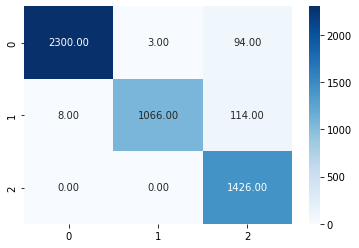



Validation Results:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       460
           1       0.99      0.91      0.95       290
           2       0.82      0.95      0.88       230

    accuracy                           0.93       980
   macro avg       0.92      0.93      0.93       980
weighted avg       0.94      0.93      0.93       980



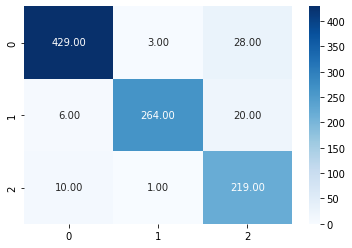



Testing Results:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       400
           1       0.97      0.76      0.85       300
           2       0.75      0.98      0.85       270

    accuracy                           0.89       970
   macro avg       0.90      0.89      0.88       970
weighted avg       0.91      0.89      0.89       970



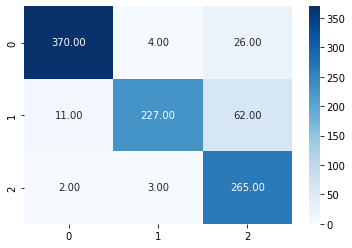

In [ ]:
print(f"Training Results:\n{classification_report(resdict['Train']['Truth'], resdict['Train']['Pred'])}")
sns.heatmap(confusion_matrix(resdict['Train']['Truth'], resdict['Train']['Pred']), annot=True, fmt=".2f", cmap="Blues", vmin=0)
plt.show()
print(f"\n\nValidation Results:\n{classification_report(resdict['Val']['Truth'], resdict['Val']['Pred'])}")
sns.heatmap(confusion_matrix(resdict['Val']['Truth'], resdict['Val']['Pred']), annot=True, fmt=".2f", cmap="Blues", vmin=0)
plt.show()
print(f"\n\nTesting Results:\n{classification_report(resdict['Test']['Truth'], resdict['Test']['Pred'])}")
sns.heatmap(confusion_matrix(resdict['Test']['Truth'], resdict['Test']['Pred']), annot=True, fmt=".2f", cmap="Blues", vmin=0)
plt.show()

In [ ]:
for beta in []